# Kinetic Monte Carlo: Esercizio 2 punto 1

## SVOLGIMENTO PUNTO 1

Perform a simulation of deposition only (0 𝐾, i.e. no diffusion) with 𝜙 = 0.2 𝑀𝐿/𝑠 up to a nominal
coverage 𝜃 = 5 𝑀𝐿

---

### 0) Importazioni e dati

In [ ]:
import numpy as np
from CMS.MonteCarlo.KineticMonteCarlo import KineticMonteCarlo

### #) Simulazione

#### Dati

In [2]:
flux = 0.2 # ML/s monolayers per secondo
temperature = 0  # K
nominal_coverage = 5.0  # ML monolayers 
simulation_time = nominal_coverage / flux  # s secondi
L = (60,60) # dimensioni della griglia in unità di celle cristalline

In [ ]:
simulation = KineticMonteCarlo(L=L, flux=flux, T=temperature, seed=42)
result = simulation.run(end_time=simulation_time)

In [4]:
result.tau_list

array([0.00136397, 0.00071259, 0.0039526 , ..., 0.00099965, 0.00323358,
       0.00102905], shape=(18186,))

---

## Analisi risultati

Analyze the sequence of escape times 𝜏 extracted for each deposition event and test that their average corresponds to the reciprocal of total deposition rate and check that 𝜏 values distribute with the expected exponential distribution. Observe the morphology of the deposited film and the square-root behavior of 𝜎 𝜃 .

### Distribuzione tau

Istogramma dei valori di $\tau$ generati durante la simulazione

In [5]:
def espected_tau_pdf (k_depo, x):
    return k_depo * np.exp(-k_depo * x)

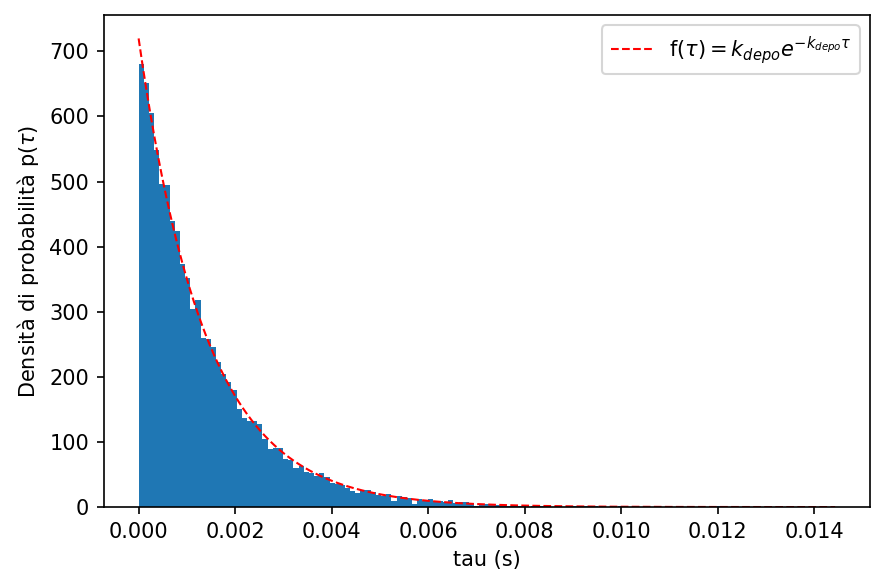

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = result.dt_list # T=0, ergo dt coincide con tau perché ho solo eventi di deposizione
n = len(x)
n_bins = round(np.sqrt(n))

x_curve = np.linspace(min(x), max(x), n)
y_curve = espected_tau_pdf(result.k_depo, x_curve)

# plot #
plt.figure(figsize=(6,4), dpi=150)
# istogramma NORMALIZZATO (con density=True diventa una pdf)
y, bins, _ =plt.hist(x, bins=n_bins, density=True)
# curva teorica
plt.plot(x_curve, y_curve,
         label='f($\\tau)=k_{depo}e^{-k_{depo}\\tau}$', 
         color='red', 
         linestyle='--',
         linewidth=1)

plt.xlabel('tau (s)')
plt.ylabel('Densità di probabilità p($\\tau$)')
plt.legend()
plt.tight_layout()
plt.show()

**test che sia come il reciproco del deposition rate**

In [ ]:
np.mean(result.dt_list)

np.float64(0.0013747065283844233)

In [8]:
# reciproco del tasso di deposizione
1/result.k_depo

0.001388888888888889

Molto simili!

### Plot roughness

Observe the morphology of the deposited film and the square-root behavior of 𝜎(𝜃). Stick-Where-You-Hit

In [9]:
def radice_quad(x, A):
    return A * np.sqrt(x)

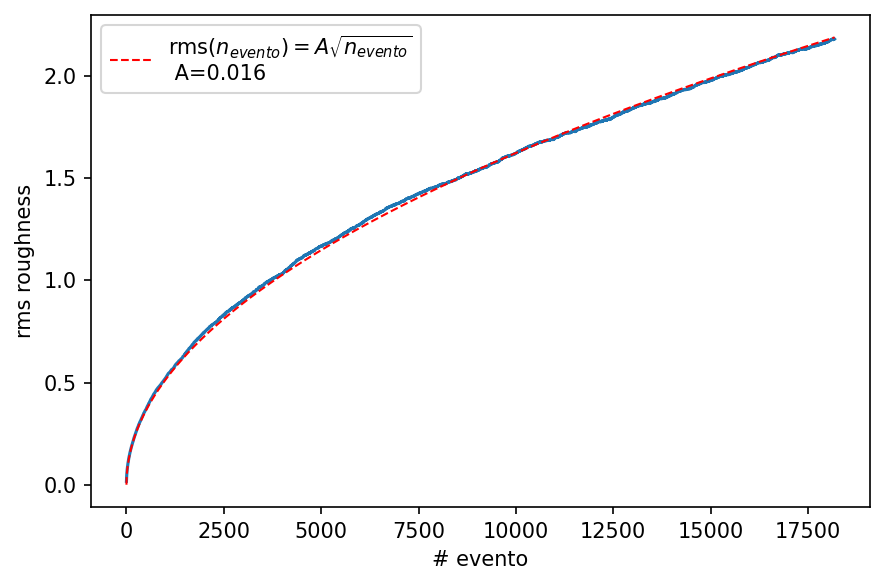

In [10]:
x = np.arange(len(result.rms_roughness_list))
y = result.rms_roughness_list

plt.figure(figsize=(6,4), dpi=150)
# plot #
plt.plot(x, y)
# fit #
popt, pcov = curve_fit(radice_quad, x, y, p0=[1.0])
A_fit = popt[0]
# curva di fit
y_fit = radice_quad(x, A_fit)
plt.plot(x, y_fit,
         label=f"rms($n_{{evento}})=A\\sqrt{{n_{{evento}}}}$ \n A={A_fit:.3f}",
         color='red',
         linestyle='--',
         linewidth=1)
plt.legend()
plt.xlabel('# evento')
plt.ylabel('rms roughness')
plt.tight_layout()
plt.show()